# Naive Bayes from scratch

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

import torch
import torchvision

from sklearn.model_selection import cross_val_score


## Предварительные знания

### [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)

P(A | B) = P(B | A)*P(A) / P(B)
- P(A | B) is a conditional probability: the probability of event A occurring given that B is true. It is also called the **posterior probability** of A given B.
- P(B | A) is also a conditional probability: the probability of event B occurring given that A is true. It can also be interpreted as the **likelihood** of A given a fixed B.
- P(A) and P(B) are the probabilities of observing A and B respectively without any given conditions; they are known as the **marginal probability** or **prior probability**.


## Импортируем данные

### Import Fashion mnist

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    # train = True,
    # download = True,
    # transform = torchvision.transforms.Compose([
    #     torchvision.transforms.ToTensor()                                 
    # ])
)

In [3]:
train_set.data.shape

torch.Size([60000, 28, 28])

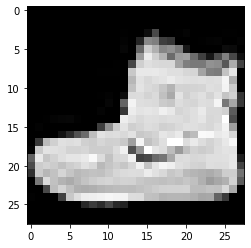

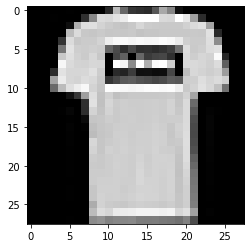

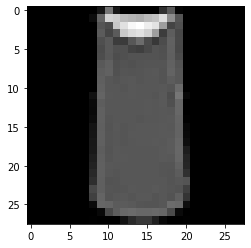

In [4]:
for image_data in train_set.data[:3]:
	plt.imshow(image_data, cmap="gray")
	plt.show()

In [5]:
X = train_set.data.numpy()
y = train_set.targets.numpy()

In [10]:
X.shape

(60000, 28, 28)

In [11]:
np.array([[1, 2], [3, 4]]).flatten()
# X[]

array([1, 2, 3, 4])

## Sklearn Naive Bayes

In [9]:
model = GaussianNB()
scores = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring=make_scorer(accuracy_score))

d:\programming\volsu\semester_6\ai\volsu_ai\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\programming\volsu\semester_6\ai\volsu_ai\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programming\volsu\semester_6\ai\volsu_ai\lib\site-packages\sklearn\naive_bayes.py", line 245, in fit
    return self._partial_fit(
  File "d:\programming\volsu\semester_6\ai\volsu_ai\lib\site-packages\sklearn\naive_bayes.py", line 402, in _partial_fit
    X, y = s